In [1]:
from autoencoders import DenseAutoencoder, limit_memory

In [2]:
limit_memory(gb=4)

In [3]:
import numpy as np
from tensorflow.keras import datasets

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))

x_train = x_train / 255
x_test = x_test / 255

x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [4]:
dense_aut_config = {
    'x_train_in': x_train,
    'x_test_in': x_test,
    'input_shape': 784,
    'encoding_dim': 20,
    'layers_config': {'encoder_layers': [64, 32],
                      'decoder_layers': [32, 64]}
}

In [5]:
dense_aut = DenseAutoencoder(**dense_aut_config).init_model()
dense_aut.compile()

In [6]:
dense_aut.autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 20)                660       
                                                                 
 dense_3 (Dense)             (None, 32)                672       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 784)               50960 

In [7]:
dense_aut.fit(10, 128)

Epoch 1/10
469/469 [==============================] - 7s 10ms/step - loss: 0.0591 - val_loss: 0.0372
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0340 - val_loss: 0.0306
Epoch 3/10
469/469 [==============================] - 4s 10ms/step - loss: 0.0287 - val_loss: 0.0265
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0258 - val_loss: 0.0244
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0236 - val_loss: 0.0222
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0220 - val_loss: 0.0211
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0211 - val_loss: 0.0202
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0203 - val_loss: 0.0196
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0197 - val_loss: 0.0189
Epoch 10/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0191 - val_loss: 0.0

313/313 [==============================] - 1s 4ms/step


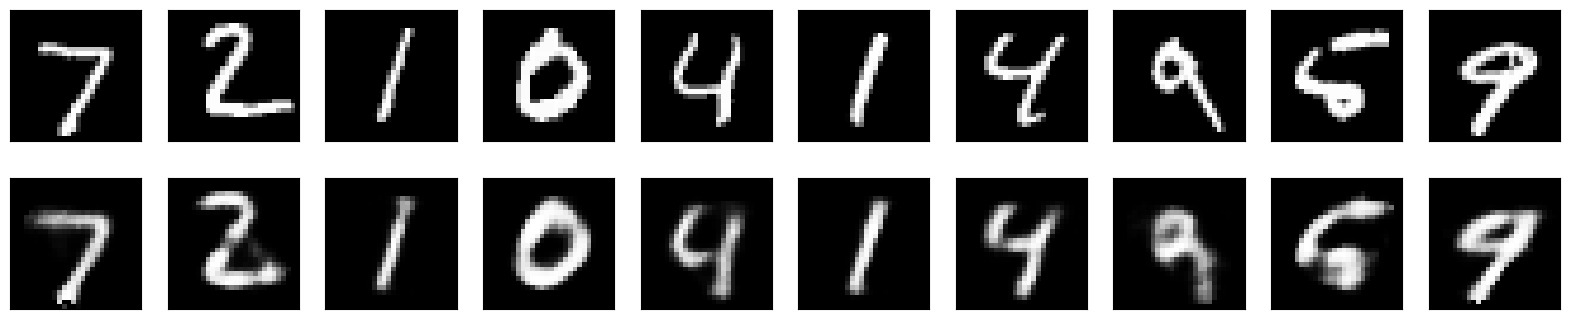

In [8]:
dense_aut.show_examples()

In [9]:
encoder = dense_aut.get_encoder()

In [10]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 20)                660       
                                                                 
Total params: 52,980
Trainable params: 52,980
Non-trainable params: 0
_________________________________________________________________


In [11]:
encoded = encoder.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [12]:
encoded.shape

(10000, 20)

In [13]:
decoder = dense_aut.get_decoder()

In [14]:
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_3 (Dense)             (None, 32)                672       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 784)               50960     
                                                                 
Total params: 53,744
Trainable params: 53,744
Non-trainable params: 0
_________________________________________________________________


In [15]:
decoded = decoder.predict(encoded)

313/313 [==============================] - 1s 3ms/step


In [16]:
decoded.shape

(10000, 784)

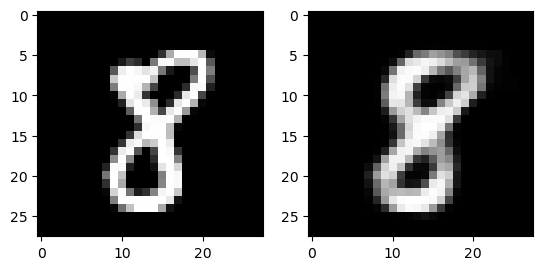

In [17]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 2)
axes[0].imshow(x_test[134].reshape(28, 28))
axes[1].imshow(decoded[134].reshape(28, 28))
plt.show()